In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
data = pd.read_csv('clear_phone.csv')
del data['Unnamed: 0']

In [3]:
data.head()

,rating,price,inbuilt memory,battery,display size,display hz,camera,smartphone
0,89.0,61048.89,256.0,5000.0,6.70,120.0,50.0,oneplus 11 5g
1,81.0,22187.79,128.0,5000.0,6.59,120.0,64.0,oneplus nord ce 2 lite 5g
2,75.0,18313.89,64.0,5000.0,6.60,90.0,50.0,samsung galaxy a14 5g
3,81.0,16648.89,128.0,5000.0,6.55,120.0,50.0,motorola moto g62 5g
4,82.0,27748.89,128.0,5000.0,6.70,120.0,108.0,realme 10 pro plus


In [4]:
rating = np.array(data.rating.to_list()).reshape(-1, 1)
rating

array([[89.],
       [81.],
       [75.],
       [81.],
       [82.],
       [80.],
       [81.],
       [86.],
       [85.],
       [84.],
       [82.],
       [79.],
       [79.],
       [80.],
       [72.],
       [79.],
       [65.],
       [86.],
       [86.],
       [72.],
       [85.],
       [85.],
       [80.],
       [76.],
       [87.],
       [88.],
       [84.],
       [76.],
       [83.],
       [72.],
       [84.],
       [81.],
       [83.],
       [73.],
       [85.],
       [87.],
       [87.],
       [72.],
       [83.],
       [83.],
       [83.],
       [83.],
       [87.],
       [85.],
       [80.],
       [81.],
       [76.],
       [64.],
       [68.],
       [72.],
       [79.],
       [82.],
       [64.],
       [83.],
       [74.],
       [75.],
       [82.],
       [78.],
       [89.],
       [75.],
       [78.],
       [85.],
       [79.],
       [75.],
       [81.],
       [86.],
       [89.],
       [87.],
       [78.],
       [72.],
       [62.],
      

In [5]:
model_rating = KMeans()
model_rating.fit(rating)

model_rating.cluster_centers_

C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


array([[88.03225806],
       [71.80813953],
       [82.13605442],
       [61.85714286],
       [75.52816901],
       [67.08219178],
       [84.91719745],
       [79.0859375 ]])

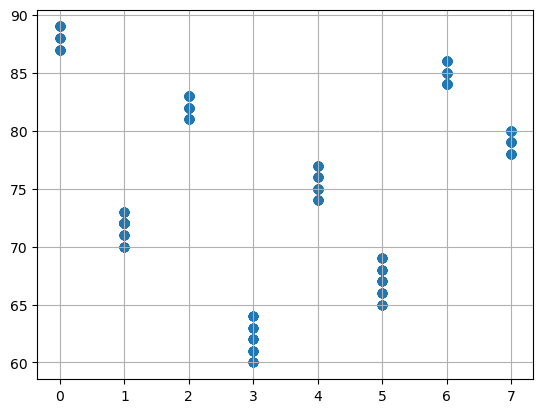

In [6]:
plt.scatter(model_rating.predict(rating), rating)
plt.grid(True)

In [5]:
data = data.rename(columns={'display size (inch)': 'display size', 'display frequancy (hz)': 'display hz',
                    'rear camera (max mp)': 'camera'})

In [6]:
model_price = KMeans()
price = np.array(data.price).reshape(-1, 1)
model_price.fit(price)


C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans()

**Нужно удалить телефоны, цена которых больше 400000**

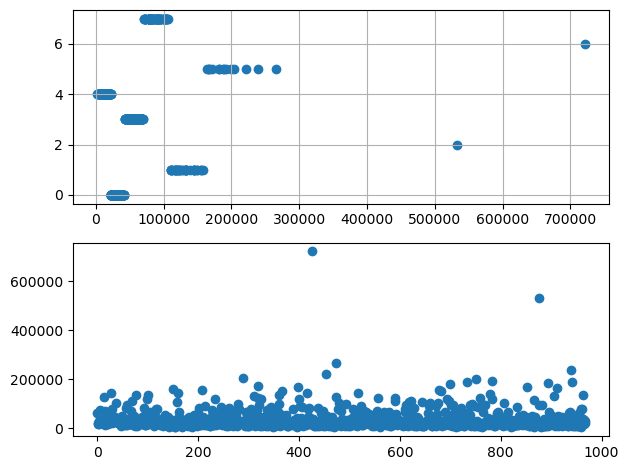

In [9]:
plt.subplot(2, 1, 1)
plt.scatter(price, model_price.predict(price))
plt.grid(True)

plt.subplot(2,1, 2)
plt.scatter(range(len(price)), price)
plt.tight_layout()

In [7]:
sort_df = data.sort_values(by='price', ascending=False)
sort_df.head()

,rating,price,inbuilt memory,battery,display size,display hz,camera,smartphone
425,62.0,721500.00,64.0,2275.0,4.70,60.0,13.0,vertu signature touch
876,88.0,532800.00,256.0,4000.0,6.39,60.0,48.0,xiaomi redmi k20 pro signature edition
474,81.0,266398.89,256.0,4700.0,6.74,120.0,50.0,huawei mate 50 rs porsche design
939,72.0,238638.90,512.0,4500.0,6.53,60.0,40.0,huawei mate 30 rs porsche design
454,72.0,221988.90,512.0,4050.0,7.92,60.0,108.0,xiaomi mi mix alpha


In [8]:
for x in sort_df.index:
    print(x,'    ', round(sort_df.price[x] ,1) , data.smartphone[x])

425      721500.0 vertu signature touch
876      532800.0 xiaomi redmi k20 pro signature edition
474      266398.9 huawei mate 50 rs porsche design
939      238638.9 huawei mate 30 rs porsche design
454      221988.9 xiaomi mi mix alpha
288      203128.9 apple iphone 14 pro max (1tb)
750      199689.0 apple iphone 13 pro max (1tb)
783      192028.9 apple iphone 14 pro (1tb)
733      188589.0 apple iphone 14 pro max (512gb)
942      187590.0 huawei mate x
894      182017.8 samsung galaxy z fold 4 (12gb ram + 1tb)
699      180918.9 huawei mate xs 2
318      172047.8 samsung galaxy z fold 4
852      166498.9 royole flexpai 3 5g
397      166389.0 apple iphone 15 ultra
912      164169.0 apple iphone 13 pro (1tb)
150      158718.9 apple iphone 15 pro max
208      155388.9 apple iphone 14 pro max (256gb)
677      155289.0 apple iphone 13 pro max (256gb)
682      149848.9 oppo x 2021
366      149848.9 sony xperia pro-i
415      144288.9 apple iphone 14 pro (256gb)
27      144288.9 apple iphone

**Удалим первые 5 смартфонов, так как они дороже из-за использования драгоценных металлов**

In [9]:
data = data[data.price < 211000]
data = data.dropna()


In [40]:
data = data.reset_index(drop=True)
data

,rating,price,inbuilt memory,battery,display size,display hz,camera,smartphone
0,89.0,61048.89,256.0,5000.0,6.70,120.0,50.0,oneplus 11 5g
1,81.0,22187.79,128.0,5000.0,6.59,120.0,64.0,oneplus nord ce 2 lite 5g
2,75.0,18313.89,64.0,5000.0,6.60,90.0,50.0,samsung galaxy a14 5g
3,81.0,16648.89,128.0,5000.0,6.55,120.0,50.0,motorola moto g62 5g
4,82.0,27748.89,128.0,5000.0,6.70,120.0,108.0,realme 10 pro plus
...,...,...,...,...,...,...,...,...
958,83.0,38838.90,128.0,5000.0,6.67,120.0,64.0,motorola moto edge s30 pro
959,75.0,16638.90,128.0,5000.0,6.50,60.0,48.0,honor x8 5g
960,85.0,32178.90,256.0,5080.0,6.60,144.0,64.0,poco x4 gt 5g (8gb ram + 256gb)
961,80.0,22188.90,128.0,5000.0,6.80,60.0,108.0,motorola moto g91 5g


C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

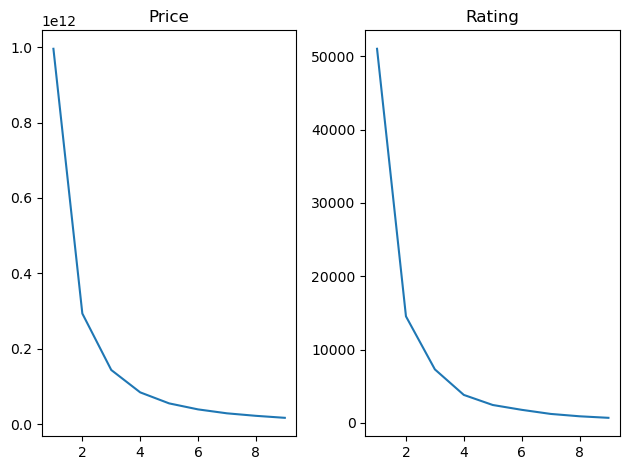

In [18]:
wcss_price = []
wcss_rating = []
for x in range(1, 10):
    kmeans_price = KMeans(n_clusters=x, random_state=1).fit(price)
    kmeans_rating = KMeans(n_clusters=x, random_state=1).fit(rating)
    wcss_price.append(kmeans_price.inertia_)
    wcss_rating.append(kmeans_rating.inertia_)
    
plt.subplot(1, 2, 1)
plt.title('Price')
plt.plot(range(1, 10), wcss_price)

plt.subplot(1,2,2)
plt.title('Rating')
plt.plot(range(1, 10), wcss_rating)

plt.tight_layout()

**Выбираем n_cluster = 5**

In [25]:
model_rating = KMeans(n_clusters=5, random_state=42)
model_rating.fit(rating)

price = np.array(data.price).reshape(-1, 1)
model_price = KMeans(n_clusters=5, random_state=42)
model_price.fit(price)

C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

KMeans(n_clusters=5, random_state=42)

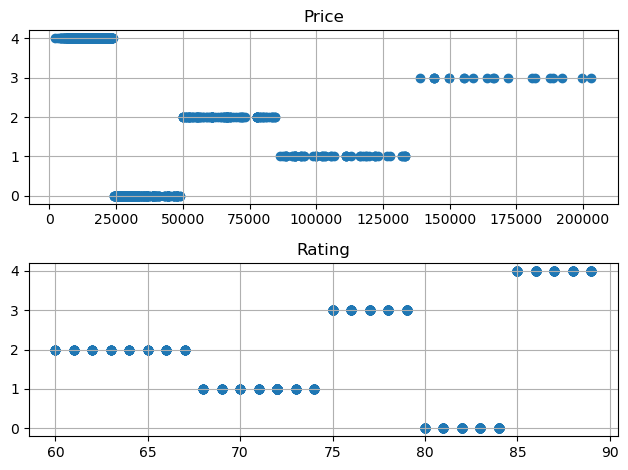

In [27]:
plt.subplot(2, 1, 1)
plt.title('Price')
plt.scatter(price, model_price.predict(price))
plt.grid(True)

plt.subplot(2,1, 2)
plt.title('Rating')
plt.scatter(rating, model_rating.predict(rating))
plt.grid(True)

plt.tight_layout()

In [55]:
len(data.price.to_list()), len(data)

(963, 963)

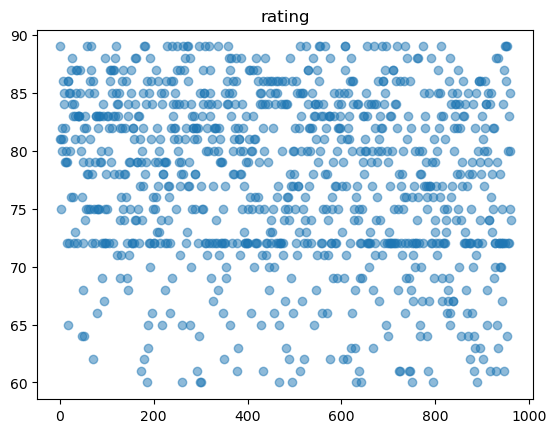

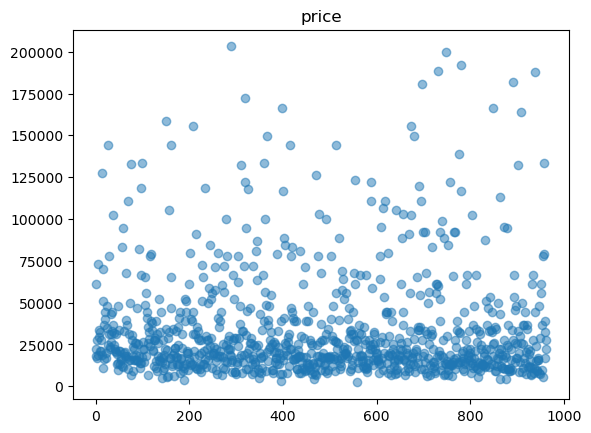

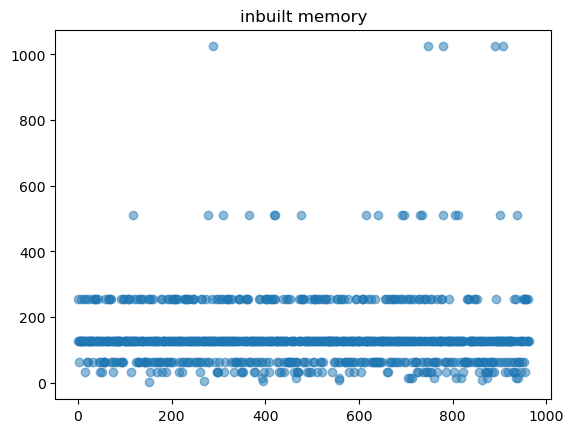

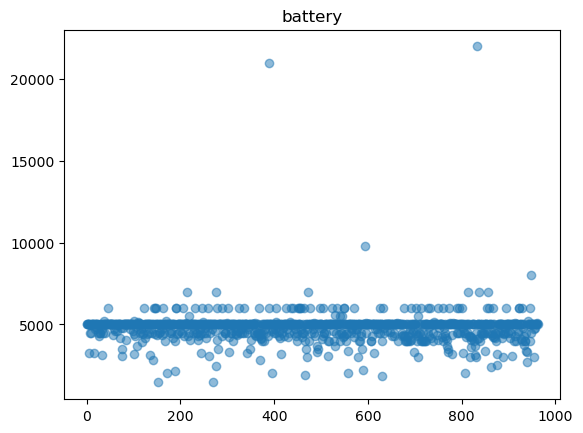

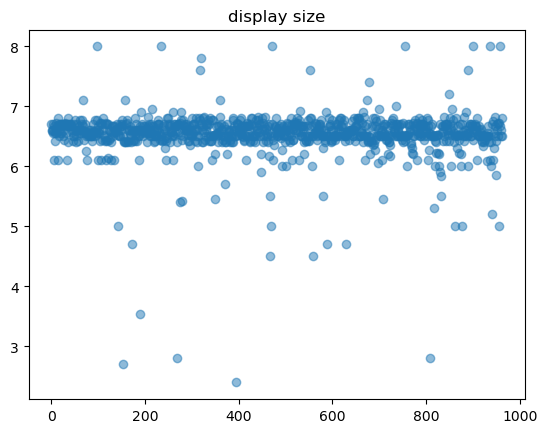

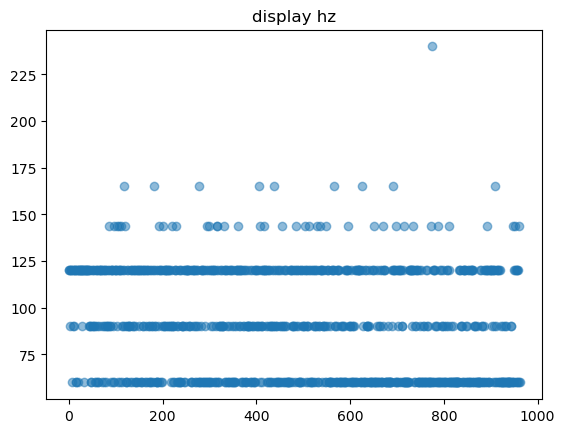

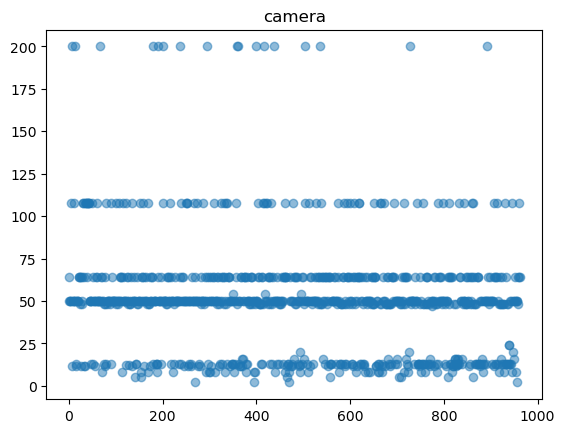

In [62]:
for col in data.columns[:-1]:
    plt.title(col)
    plt.scatter(range(len(data)), data[col].to_list(), alpha=0.5)
    plt.show()

**Данные нужно немного почистить**

In [71]:
data = data[data['battery'] < 7999]
data = data[data['display size'] > 4]
data = data[data['display hz'] < 225]
data.reset_index(drop=True)
data

,rating,price,inbuilt memory,battery,display size,display hz,camera,smartphone
0,89.0,61048.89,256.0,5000.0,6.70,120.0,50.0,oneplus 11 5g
1,81.0,22187.79,128.0,5000.0,6.59,120.0,64.0,oneplus nord ce 2 lite 5g
2,75.0,18313.89,64.0,5000.0,6.60,90.0,50.0,samsung galaxy a14 5g
3,81.0,16648.89,128.0,5000.0,6.55,120.0,50.0,motorola moto g62 5g
4,82.0,27748.89,128.0,5000.0,6.70,120.0,108.0,realme 10 pro plus
...,...,...,...,...,...,...,...,...
958,83.0,38838.90,128.0,5000.0,6.67,120.0,64.0,motorola moto edge s30 pro
959,75.0,16638.90,128.0,5000.0,6.50,60.0,48.0,honor x8 5g
960,85.0,32178.90,256.0,5080.0,6.60,144.0,64.0,poco x4 gt 5g (8gb ram + 256gb)
961,80.0,22188.90,128.0,5000.0,6.80,60.0,108.0,motorola moto g91 5g


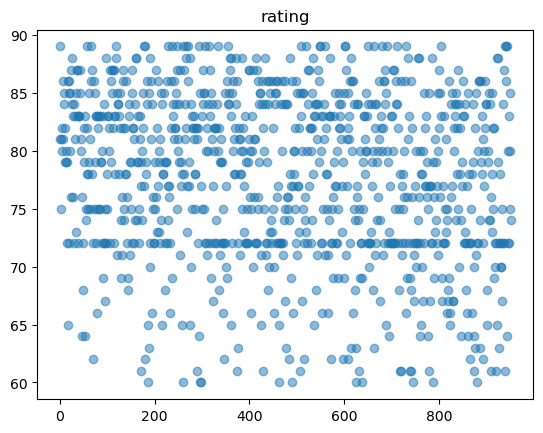

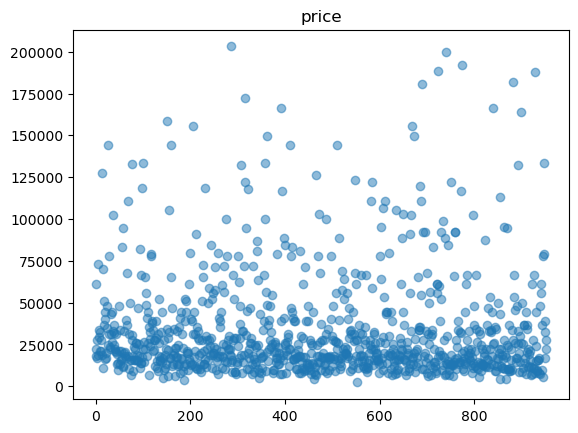

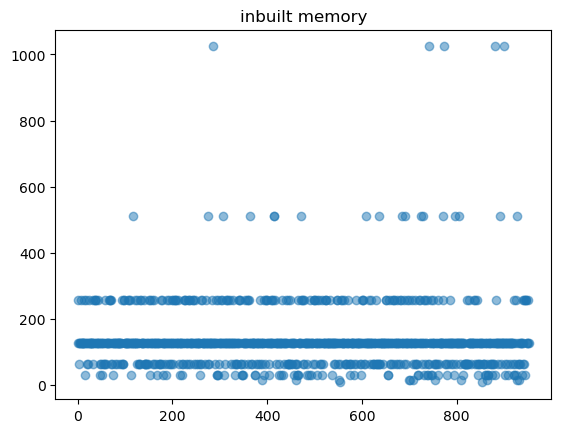

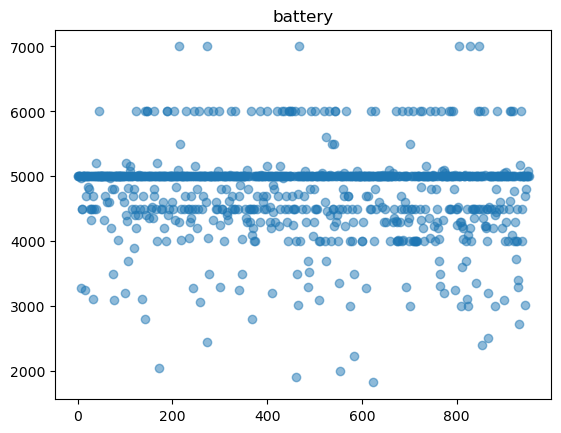

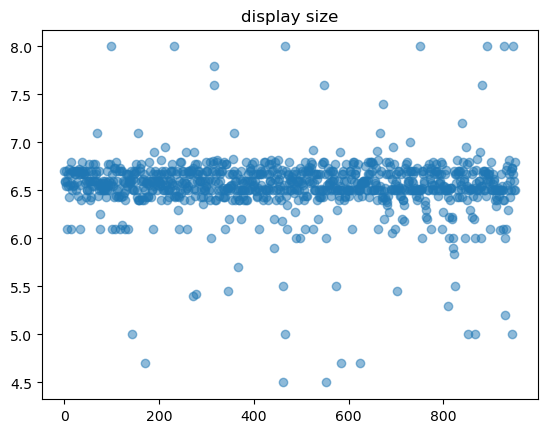

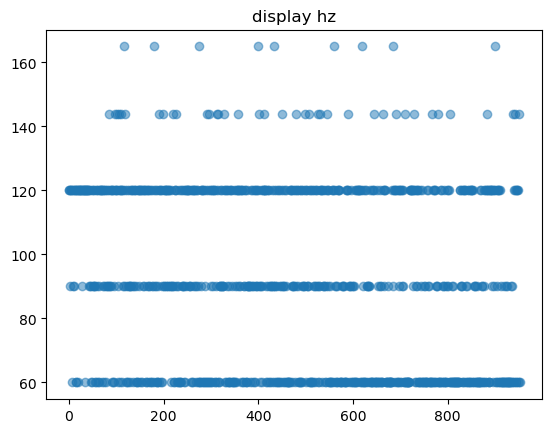

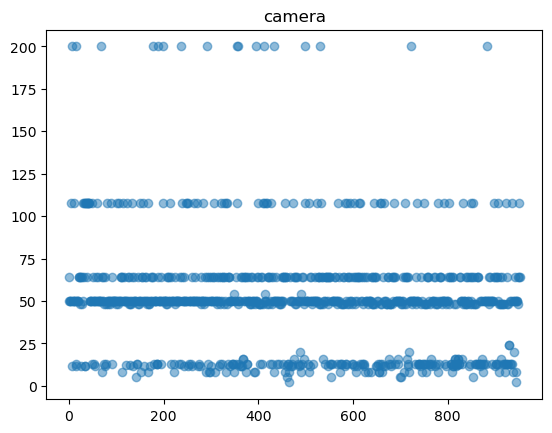

In [72]:
for col in data.columns[:-1]:
    plt.title(col)
    plt.scatter(range(len(data)), data[col].to_list(), alpha=0.5)
    plt.show()

**Теперь датасет готов**

In [74]:
data.to_csv('CLEAR_DATASET.csv')